In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import difflib
from difflib import get_close_matches
import pickle
import math

In [351]:
if not path.exists("pickle_files_for_submission"):
    os.mkdir('pickle_files_for_submission')

In [352]:
#load data from the csv file - salaries.csv - which is given.
df = pd.read_csv('salaries.csv')
df.head()

,salary,name,total_value,pos,years,avg_annual,team
0,"$ 3,800,000",Darryl Strawberry,"$ 3,800,000",OF,1 (1991),"$ 3,800,000",LAD
1,"$ 3,750,000",Kevin Mitchell,"$ 3,750,000",OF,1 (1991),"$ 3,750,000",SF
2,"$ 3,750,000",Will Clark,"$ 3,750,000",1B,1 (1991),"$ 3,750,000",SF
3,"$ 3,625,000",Mark Davis,"$ 3,625,000",P,1 (1991),"$ 3,625,000",KC
4,"$ 3,600,000",Eric Davis,"$ 3,600,000",OF,1 (1991),"$ 3,600,000",CIN


# Data wrangling/cleaning

In [337]:
#removing the extra columns from the dataframe
df = df[['years','team','pos','name','salary']]
df = df.astype(str)
df.head()

,years,team,pos,name,salary
0,1 (1991),LAD,OF,Darryl Strawberry,"$ 3,800,000"
1,1 (1991),SF,OF,Kevin Mitchell,"$ 3,750,000"
2,1 (1991),SF,1B,Will Clark,"$ 3,750,000"
3,1 (1991),KC,P,Mark Davis,"$ 3,625,000"
4,1 (1991),CIN,OF,Eric Davis,"$ 3,600,000"


In [2]:
#following are the column that we will use in our analysis
columns = ['years','name','team','salary','pos']

salaries_df = pd.DataFrame(columns=columns)


#this piece of code will cleaning the data
'''changes:
            - 5 (2006-11) break such values in the salaries_df['salary'] and add the 5 new rows with 
                1 (2006)
                1 (2007)
                .
                .
                so on
            - remove $ sign and comma(,) from salary column'''


for index, row in df.iterrows():
    temp = row['years'].split(" ")
    if(int(temp[0]) > 1):
        total = int(temp[0])
        year_start = row['years'].split('(')
        year_start = year_start[1].split('-')
        year_start = int(year_start[0])
        name = row['name']
        salary = row['salary']
        pos = row['pos']
        team = row['team']
        for a in range(0,total):
            line = pd.DataFrame({'years':"1 ("+str(year_start)+")", 'name':name,'team':team,'salary':salary,'pos':pos},index = [index])
            salaries_df = salaries_df.append(line, ignore_index=True)
            year_start = year_start+1
    else:
        salaries_df = salaries_df.append(row, ignore_index=True)


#removing spaces and other special characters from the salary column#removing the extra columns from the dataframe
df = df[['years','team','pos','name','salary']]
df = df.astype(str)
salaries_df = salaries_df[['years','team','pos','name','salary']]
salaries_df['salary'] = salaries_df['salary'].str.replace("$","")
salaries_df['salary'] = salaries_df['salary'].str.replace(",","")
salaries_df['salary'] = salaries_df['salary'].str.replace(" ","")

salaries_df['years'] = [row['years'].split(" ")[1] for index,row in salaries_df.iterrows()]
salaries_df['years'] = salaries_df['years'].str.replace("(","")
salaries_df['years'] = salaries_df['years'].str.replace(")","")

salaries_df[['years']] = salaries_df[['years']].apply(pd.to_numeric)
salaries_df[['salary']] = salaries_df[['salary']].apply(pd.to_numeric)

salaries_df = salaries_df.sort_index().reset_index(drop=True)
salaries_df.to_csv("output.csv", index=False, encoding='utf8')            


In [3]:
#change the data type of the salary column to numeric
salaries_df.astype({'salary': 'int64'}).dtypes

years      int64
team      object
pos       object
name      object
salary     int64
dtype: object

In [4]:
salaries_df.head()

,years,team,pos,name,salary
0,1991,LAD,OF,Darryl Strawberry,3800000.0
1,1991,SF,OF,Kevin Mitchell,3750000.0
2,1991,SF,1B,Will Clark,3750000.0
3,1991,KC,P,Mark Davis,3625000.0
4,1991,CIN,OF,Eric Davis,3600000.0


# Reading the salaries data from the given link and saperate the batters and pitchers data

In [338]:
#making different dataframes for batters
one_b = salaries_df[salaries_df['pos'] == '1B']
two_b = salaries_df[salaries_df['pos'] == '2B']
three_b = salaries_df[salaries_df['pos'] == '3B']
dh = salaries_df[salaries_df['pos'] == 'DH']
of = salaries_df[salaries_df['pos'] == 'OF']
c = salaries_df[salaries_df['pos'] == 'C']

all_batters = one_b
all_batters = all_batters.append(two_b)
all_batters = all_batters.append(three_b)
all_batters = all_batters.append(dh)
all_batters = all_batters.append(of)
all_batters = all_batters.append(c)

all_batters = all_batters.sort_index().reset_index(drop=True)
all_batters.to_csv("all_batters.csv", index=False, encoding='utf8')


# #making different dataframes for pitchers
p = salaries_df[salaries_df['pos'] == 'P']
rp = salaries_df[salaries_df['pos'] == 'RP']
sp = salaries_df[salaries_df['pos'] == 'SP']
lf = salaries_df[salaries_df['pos'] == 'LF']
cf = salaries_df[salaries_df['pos'] == 'CF']
rf = salaries_df[salaries_df['pos'] == 'RF']
ss = salaries_df[salaries_df['pos'] == 'SS']

all_pitchers = p
all_pitchers = all_pitchers.append(rp)
all_pitchers = all_pitchers.append(sp)
all_pitchers = all_pitchers.append(lf)
all_pitchers = all_pitchers.append(cf)
all_pitchers = all_pitchers.append(rf)
all_pitchers = all_pitchers.append(ss)

all_pitchers = all_pitchers.sort_index().reset_index(drop=True)
all_pitchers.to_csv("all_pitchers.csv", index=False, encoding='utf8')


column_values = salaries_df[["pos"]].values.ravel()
unique_values =  pd.unique(column_values)

print(unique_values)

['OF' '1B' 'P' 'DH' '3B' '2B' 'C' 'SS' 'RF' 'SP' 'LF' 'CF' 'RP']


In [353]:
#all_batters has all the batsman data
all_batters.to_pickle('pickle_files_for_submission/pickle1.pkl')
all_batters.head()

,years,team,pos,name,salary
0,1991,LAD,OF,Darryl Strawberry,3800000.0
1,1991,SF,OF,Kevin Mitchell,3750000.0
2,1991,SF,1B,Will Clark,3750000.0
3,1991,CIN,OF,Eric Davis,3600000.0
4,1991,SF,OF,Willie McGee,3562500.0


In [354]:
#all pitchers dataframe has the data of all pitchers
all_pitchers.to_pickle('pickle_files_for_submission/pickle2.pkl')
all_pitchers.head()

,years,team,pos,name,salary
0,1991,KC,P,Mark Davis,3625000.0
1,1991,LAA,P,Mark Langston,3550000.0
2,1991,OAK,P,Dave Stewart,3500000.0
3,1991,OAK,P,Bob Welch,3450000.0
4,1991,PIT,P,Doug Drabek,3350000.0


# Get all the statistics of batters form the given link

In [3]:
print('loading stats of batting from (1988-2016) https://www.baseball-reference.com/leagues/MLB/')
import requests as rq
import os
from os import path
year = 1988

if not path.exists("batting-statistic-1988-2016"):
    os.mkdir('batting-statistic-1988-2016')

for y in range(1988,2017):
    page_content = rq.get( "https://www.baseball-reference.com/leagues/MLB/"+str(year)+"-standard-batting.shtml" ).content    
    page_content = str( page_content ) # convert downloaded data to a string
    start_of_table_1 = page_content.index( "<table" ) # where the first table starts
    start_of_table_2 = page_content.index( "<table", start_of_table_1 + 1 )
    # previous line starts looking for <table AFTER the first one
    second_table_html = page_content[start_of_table_2:] # just take everything from there onwards
    player_df = pd.read_html( second_table_html ) # make a dataframe from there
    player_df = player_df[0]
    player_df.insert(0, 'Year', year)
    player_df = player_df.astype(str)
    for index,row in player_df.iterrows():
        if(row['Rk'] == "Rk" ):
            delete_row = player_df[player_df["Rk"] == row['Rk']].index
            player_df = player_df.drop(delete_row)
        if(row['Name'] == "LgAvg per 600 PA"):
            delete_row = player_df[player_df["Name"] == row['Name']].index
            player_df = player_df.drop(delete_row)
            
    player_df.to_csv("./batting-statistic-1988-2016/"+str(year)+"-batting-statistics.csv", index=False, encoding='utf8')
    print(str(year)+" Loaded...")
    print
    year += 1

loading stats of batting from https://www.baseball-reference.com/leagues/MLB/
1988 Loaded...
1989 Loaded...
1990 Loaded...
1991 Loaded...
1992 Loaded...
1993 Loaded...
1994 Loaded...
1995 Loaded...
1996 Loaded...
1997 Loaded...
1998 Loaded...
1999 Loaded...
2000 Loaded...
2001 Loaded...
2002 Loaded...
2003 Loaded...
2004 Loaded...
2005 Loaded...
2006 Loaded...
2007 Loaded...
2008 Loaded...
2009 Loaded...
2010 Loaded...
2011 Loaded...
2012 Loaded...
2013 Loaded...
2014 Loaded...
2015 Loaded...
2016 Loaded...


# Get all the statistics of pitchers from the given link

In [249]:
print('loading stats of pitching from (1988-2016) https://www.baseball-reference.com/leagues/MLB/')
year = 1988

if not path.exists("pitching-statistic-1988-2016"):
    os.mkdir('pitching-statistic-1988-2016')

for y in range(1988,2016):
    page_content = rq.get( "https://www.baseball-reference.com/leagues/MLB/"+str(year)+"-standard-pitching.shtml" ).content    
    page_content = str( page_content ) # convert downloaded data to a string
    start_of_table_1 = page_content.index( "<table" ) # where the first table starts
    start_of_table_2 = page_content.index( "<table", start_of_table_1 + 1 )
    # previous line starts looking for <table AFTER the first one
    second_table_html = page_content[start_of_table_2:] # just take everything from there onwards
    player_df = pd.read_html( second_table_html ) # make a dataframe from there
    player_df = player_df[0]
    player_df.insert(0, 'Year', year)
    player_df = player_df.astype(str)
    for index,row in player_df.iterrows():
        if(row['Rk'] == "Rk" ):
            delete_row = player_df[player_df["Rk"] == row['Rk']].index
            player_df = player_df.drop(delete_row)
        if(row['Name'] == "LgAvg per 180 IP"):
            delete_row = player_df[player_df["Name"] == row['Name']].index
            player_df = player_df.drop(delete_row)
            
    player_df.to_csv("./pitching-statistic-1988-2016/"+str(year)+"-pitching-statistics.csv", index=False, encoding='utf8')
    print(str(year)+" Loaded...")
    print
    year += 1

# Combinig all the batting-statistics (1988-2016) in a single DataFrame 

In [355]:
survey_sub = pd.read_csv('batting-statistic-1988-2016/1988-batting-statistics.csv')
all_batting_statistics_df = survey_sub
for y in range(1989,2017):
    survey_sub = pd.read_csv("batting-statistic-1988-2016/"+str(y)+"-batting-statistics.csv")
    all_batting_statistics_df = pd.concat([all_batting_statistics_df, survey_sub], axis=0)

all_batting_statistics_df.to_csv("all_batting_statistics_new.csv", index=False, encoding='utf8')

# Select the columns from all batting statistics dataframe which will be used in analysis

In [357]:
#saving the thrid pickle for submission
all_batting_statistics_df.to_pickle('pickle_files_for_submission/pickle3_batting_statistics.pkl')
all_batting_statistics_df.head()

,Year,Rk,Name,Age,Tm,Lg,G,PA,AB,R,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary
0,1988,1,Shawn Abner,22,SDP,NL,37,89,83,6,...,0.289,0.514,48.0,24,1,1,0,1,1,987
1,1988,2,Jim Acker,29,ATL,NL,21,6,5,0,...,0.400,0.900,158.0,2,0,0,0,0,0,1
2,1988,3,Jim Adduci*,28,MIL,AL,44,97,94,8,...,0.383,0.641,77.0,36,1,0,0,3,0,7D/93
3,1988,4,Juan Agosto*,30,HOU,NL,75,6,5,0,...,0.000,0.000,-100.0,0,0,0,1,0,0,1
4,1988,5,Luis Aguayo,29,TOT,MLB,99,260,237,21,...,0.354,0.663,88.0,84,6,1,1,1,3,564


In [358]:
#dropping all the extra columns
all_batting_statistics_df = all_batting_statistics_df[['Name','Year','Lg','Tm','RBI','H','HR','G']]

# filtering and deleting the extra rows on the basis of team from all batting statistics dataframe

In [186]:
column_values = all_batters[['team']].values.ravel()
unique_values =  pd.unique(column_values).tolist()

column_values1 = all_batting_statistics_df[['Tm']].values.ravel()
unique_values1 =  pd.unique(column_values1).tolist()

to_del = list(set(unique_values1) - set(unique_values))

df = all_batting_statistics_df.astype(str)

print(to_del)

for i in to_del:
    df.drop(df[df['Tm'] == i].index, inplace = False) 

['MON', 'CHW', 'SFG', 'TOT', 'FLA', 'TBD', 'SDP', 'WSN', 'ANA', 'CAL', 'TBR', 'KCR']


# Removing duplicates from the dataframe

In [187]:
batting_df = df.drop_duplicates(subset=['Name','Year','Lg','Tm','RBI','H','HR','G'], keep='last')

In [188]:
batting_df[batting_df.duplicated(subset=['Name','Year','Lg','Tm','RBI','H','HR','G'], keep=False)]

,Name,Year,Lg,Tm,RBI,H,HR,G


# Combinig all the pitching-statistics (1988-2016) in a single DataFrame 

In [359]:
survey_sub = pd.read_csv('pitching-statistic-1988-2016/1988-pitching-statistics.csv')
all_pitching_statistics_df = survey_sub
for y in range(1989,2017):
    survey_sub = pd.read_csv("pitching-statistic-1988-2016/"+str(y)+"-pitching-statistics.csv")
    all_pitching_statistics_df = pd.concat([all_pitching_statistics_df, survey_sub], axis=0)

all_pitching_statistics_df.to_csv("all_pitching_statistics_new.csv", index=False, encoding='utf8')

In [360]:
#saving the thrid pickle for submission
all_pitching_statistics_df.to_pickle('pickle_files_for_submission/pickle3_pitching_statistics.pkl')
all_pitching_statistics_df.head()

,Year,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1988,1,Don Aase,33,BAL,AL,0,0,NaN,4.05,...,1,209,97.0,5.06,1.650,7.7,0.8,7.1,5.4,0.76
1,1988,2,Jim Acker,29,ATL,NL,0,4,0.000,4.71,...,2,184,78.0,4.51,1.405,9.6,1.3,3.0,5.4,1.79
2,1988,3,Juan Agosto*,30,HOU,NL,10,2,0.833,2.26,...,3,371,148.0,3.88,1.135,7.3,0.6,2.9,3.2,1.10
3,1988,4,Rick Aguilera,26,NYM,NL,0,4,0.000,6.93,...,1,111,47.0,3.86,1.581,10.6,0.7,3.6,5.8,1.60
4,1988,5,Gibson Alba*,28,STL,NL,0,0,NaN,2.70,...,0,14,146.0,2.77,0.900,2.7,0.0,5.4,8.1,1.50


In [192]:
all_pitching_statistics_df.columns

all_pitching_statistics_df = all_pitching_statistics_df[['Name','Year','Lg','Tm','ERA','W','IP','SO']]

all_pitching_statistics_df.head()

,Name,Year,Lg,Tm,ERA,W,IP,SO
0,Don Aase,1988,AL,BAL,4.05,0,46.2,28
1,Jim Acker,1988,NL,ATL,4.71,0,42.0,25
2,Juan Agosto*,1988,NL,HOU,2.26,10,91.2,33
3,Rick Aguilera,1988,NL,NYM,6.93,0,24.2,16
4,Gibson Alba*,1988,NL,STL,2.70,0,3.1,3


In [193]:
df = all_pitching_statistics_df

In [194]:
pitching_df = df.drop_duplicates(subset=['Name','Year','Lg','Tm','ERA','W','IP','SO'], keep='last')

In [195]:
pitching_df.head()

,Name,Year,Lg,Tm,ERA,W,IP,SO
0,Don Aase,1988,AL,BAL,4.05,0,46.2,28
1,Jim Acker,1988,NL,ATL,4.71,0,42.0,25
2,Juan Agosto*,1988,NL,HOU,2.26,10,91.2,33
3,Rick Aguilera,1988,NL,NYM,6.93,0,24.2,16
4,Gibson Alba*,1988,NL,STL,2.70,0,3.1,3


# Merging the DataFrames of batting_statistics and batsman_salaries

In [196]:
batting_df[['Year']] = batting_df[['Year']].apply(pd.to_numeric)
len(all_batters)

11750

In [197]:
df = pd.merge( all_batters, batting_df, left_on=['years','name','team'], right_on=['Year','Name','Tm'], how='left' )
df.head()

,years,team,pos,name,salary,Name,Year,Lg,Tm,RBI,H,HR,G
0,1991,LAD,OF,Darryl Strawberry,3800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,SF,OF,Kevin Mitchell,3750000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,SF,1B,Will Clark,3750000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,CIN,OF,Eric Davis,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,SF,OF,Willie McGee,3562500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
def best_guess ( name_from_batting_df ):
    if name_from_batting_df in list(all_batters['name']):
        return name_from_batting_df
    match = get_close_matches( name_from_batting_df, list(all_batters['name']), 1 )
    if len( match ) == 1:
        return match[0]
    return np.nan

In [199]:
print("Adding an extra column for merging the datasets...")
batting_df['Closest Batsman Name'] = batting_df['Name'].apply( best_guess )

In [200]:
(batting_df[batting_df['Name'] != batting_df['Closestall_pitching_statistics_dfall_pitching_statistics_df Batsman Name']][['Name','Closest Batsman Name']]).head()

,Name,Closest Batsman Name
0,Shawn Abner,Shawn Abner
1,Jim Acker,Jim Vatcher
2,Jim Adduci*,James Adduci
3,Juan Agosto*,Juan Castro
4,Luis Aguayo,Luis Aguayo


In [201]:
batting_df.head()

,Name,Year,Lg,Tm,RBI,H,HR,G,Closest Batsman Name
0,Shawn Abner,1988,NL,SDP,5,15,2,37,Shawn Abner
1,Jim Acker,1988,NL,ATL,0,2,0,21,Jim Vatcher
2,Jim Adduci*,1988,AL,MIL,15,25,1,44,James Adduci
3,Juan Agosto*,1988,NL,HOU,0,0,0,75,Juan Castro
4,Luis Aguayo,1988,MLB,TOT,13,59,6,99,Luis Aguayo


In [364]:
merged_batting_df = pd.merge( all_batters, batting_df, left_on=['years','name','team'], right_on=['Year','Closest Batsman Name','Tm'], how='inner' )
merged_batting_df.head()

,years,team,pos,name,salary,Name,Year,Lg,Tm,RBI,H,HR,G,Closest Batsman Name
0,1991,LAD,OF,Darryl Strawberry,3800000.0,Darryl Strawberry*,1991,NL,LAD,99,134,28,139,Darryl Strawberry
1,1991,CIN,OF,Eric Davis,3600000.0,Eric Davis,1991,NL,CIN,33,67,11,89,Eric Davis
2,1991,OAK,OF,Jose Canseco,3500000.0,Jose Canseco,1991,AL,OAK,122,152,44,154,Jose Canseco
3,1991,NYY,1B,Don Mattingly,3420000.0,Don Mattingly*,1991,AL,NYY,68,169,9,152,Don Mattingly
4,1991,CHC,OF,Andre Dawson,3300000.0,Andre Dawson,1991,NL,CHC,104,153,31,149,Andre Dawson


In [361]:
merged_batting_df[['H']] = merged_batting_df[['H']].apply(pd.to_numeric)
merged_batting_df[['RBI']] = merged_batting_df[['RBI']].apply(pd.to_numeric)
merged_batting_df[['HR']] = merged_batting_df[['HR']].apply(pd.to_numeric)
merged_batting_df[['G']] = merged_batting_df[['G']].apply(pd.to_numeric)

# Merging the Pitching statistic with pitchers salaries dataset

In [203]:
pitching_df[['Year']] = pitching_df[['Year']].apply(pd.to_numeric)
len(all_pitchers)

14442

In [204]:
df = pd.merge( all_pitchers, pitching_df, left_on=['years','name','team'], right_on=['Year','Name','Tm'], how='left' )
df.head()

,years,team,pos,name,salary,Name,Year,Lg,Tm,ERA,W,IP,SO
0,1991,KC,P,Mark Davis,3625000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,LAA,P,Mark Langston,3550000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,OAK,P,Dave Stewart,3500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,OAK,P,Bob Welch,3450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,PIT,P,Doug Drabek,3350000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
def best_guess_pitching ( name_from_pitching_df ):
    # if the name is in the HIF dataframe, it's a perfect match, so return it:
    if name_from_pitching_df in list(all_pitchers['name']):
        return name_from_pitching_df
    # if get_close_matches gives me a similar name, return that:
    match = get_close_matches( name_from_pitching_df, list(all_pitchers['name']), 1 )
    if len( match ) == 1:
        return match[0]
    # otherwise, I give up, so return missing value:
    return np.nan

In [206]:
pitching_df['Closest Pitcher Name'] = pitching_df['Name'].apply( best_guess_pitching )

In [207]:
(pitching_df[pitching_df['Name'] != pitching_df['Closest Pitcher Name']][['Name','Closest Pitcher Name']]).head()

,Name,Closest Pitcher Name
0,Don Aase,Don Aase
1,Jim Acker,Jim Acker
2,Juan Agosto*,Juan Agosto
3,Rick Aguilera,Rick Aguilera
4,Gibson Alba*,Gibson Alba


In [208]:
pitching_df.head()

,Name,Year,Lg,Tm,ERA,W,IP,SO,Closest Pitcher Name
0,Don Aase,1988,AL,BAL,4.05,0,46.2,28,Don Aase
1,Jim Acker,1988,NL,ATL,4.71,0,42.0,25,Jim Acker
2,Juan Agosto*,1988,NL,HOU,2.26,10,91.2,33,Juan Agosto
3,Rick Aguilera,1988,NL,NYM,6.93,0,24.2,16,Rick Aguilera
4,Gibson Alba*,1988,NL,STL,2.70,0,3.1,3,Gibson Alba


In [365]:
merged_pitching_df = pd.merge( all_pitchers, pitching_df, left_on=['years','name','team'], right_on=['Year','Closest Pitcher Name','Tm'], how='inner' )
merged_pitching_df.head()
m_pitch_df = 

,years,team,pos,name,salary,Name,Year,Lg,Tm,ERA,W,IP,SO,Closest Pitcher Name
0,1991,OAK,P,Dave Stewart,3500000.0,Dave Stewart,1991,AL,OAK,5.18,11,226.0,144,Dave Stewart
1,1991,OAK,P,Bob Welch,3450000.0,Bob Welch,1991,AL,OAK,4.58,12,220.0,101,Bob Welch
2,1991,PIT,P,Doug Drabek,3350000.0,Doug Drabek,1991,NL,PIT,3.07,15,234.2,142,Doug Drabek
3,1991,TEX,P,Nolan Ryan,3300000.0,Nolan Ryan,1991,AL,TEX,2.91,12,173.0,203,Nolan Ryan
4,1991,BOS,P,Danny Darwin,3250000.0,Danny Darwin,1991,AL,BOS,5.16,3,68.0,42,Danny Darwin


# Question 1. How has the average and median salary of a MLB player changed over time?

I predict that it will be steadily rising over time. As the salary data only goes back to 1988, which happens to be within the first few years of MLB Free Agency, this analysis will only look at the time between 1988-2016.

I will also be looking at this with respect to league (American or National), to see if there are any significant differences between them. This will be interesting as there is no salary cap in MLB, so teams with larger fanbases tend to have a larger payroll (*cough cough New York Yankees*).

As the New York Yankees are in the American League, I guess that the larger salaries will be in that league as well.

Let's first look at the distrubution of salary data by itself:

(0.0, 30000000.0)

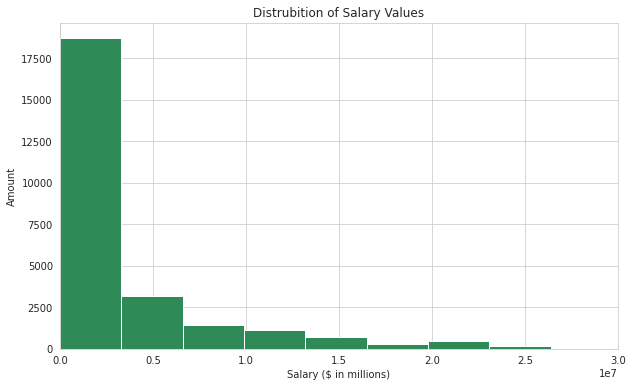

In [212]:
plt.figure(figsize=(10,6))
plt.hist(salaries_df['salary'],bins=10,color='seagreen')
plt.title('Distrubition of Salary Values')
plt.ylabel('Amount')
plt.xlabel('Salary ($ in millions)')
plt.xlim(0,30000000)

The majority of salary data points fall below $330,000. 
The next largest bin is salaries between 330,000 and 600,000 USD. The smallest bin (and highest salary range) is between 23 and 26 Million USD.

Let's now visualize how the distribution is for the following years: 1985, 1990, 2000, 2010, 2016

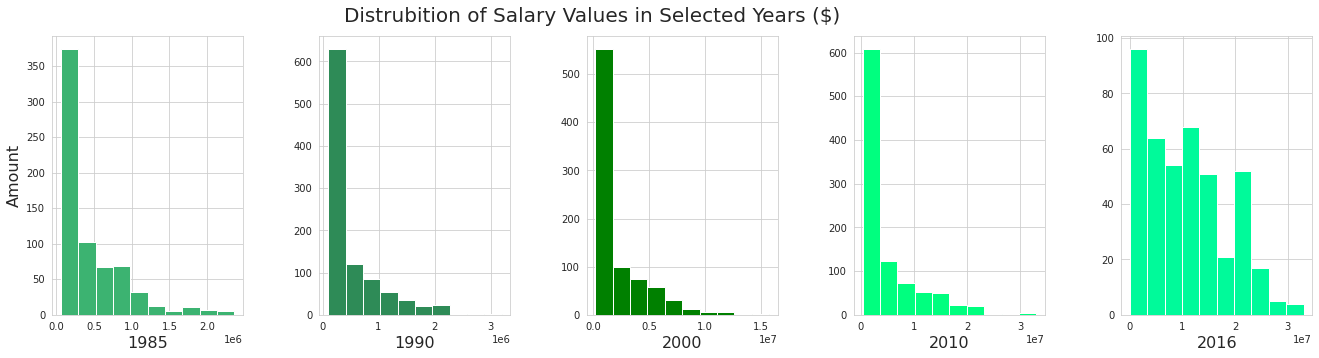

In [213]:
fig, ax = plt.subplots(ncols=5,nrows=1)
ax[0].hist(salaries_df[salaries_df['years']==1988]['salary'],bins=10,color='mediumseagreen')
ax[1].hist(salaries_df[salaries_df['years']==1990]['salary'],bins=10,color='seagreen')
ax[2].hist(salaries_df[salaries_df['years']==2000]['salary'],bins=10,color='green')
ax[3].hist(salaries_df[salaries_df['years']==2010]['salary'],bins=10,color='springgreen')
ax[4].hist(salaries_df[salaries_df['years']==2016]['salary'],bins=10,color='mediumspringgreen')
fig.set_figwidth(25)
fig.set_figheight(5)
plt.suptitle('Distrubition of Salary Values in Selected Years ($)',fontsize=20)
ax[0].set_ylabel('Amount',fontsize=16)
ax[0].set_xlabel('1985',fontsize=16)
ax[1].set_xlabel('1990',fontsize=16)
ax[2].set_xlabel('2000',fontsize=16)
ax[3].set_xlabel('2010',fontsize=16)
ax[4].set_xlabel('2016',fontsize=16)
#plt.xlabel('Salary ($ in millions)')
plt.subplots_adjust(left=0.2, wspace=0.4, top=0.9)

Here we can see the distribution of salary widen as time goes on, but with the later bins move to higher and higher ranges. Now let's see how they perform over time throughout all years, by looking at the mean salary and median salary.

In [214]:
# I am only concerned with salaries in the year 2015. I don't need to know the teams or the league of the player.
salaries_2014 = salaries_df[salaries_df['years']==2014]
salaries_2014 = salaries_2014.drop(['years', 'team', 'pos'], axis=1)

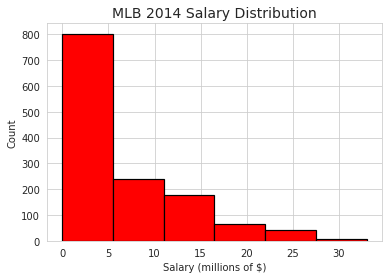

In [215]:
# Create a histogram salaries from 2014.
plt.hist((salaries_2014['salary']/1e6), bins=6, color='r', edgecolor='black', linewidth=1.2, align='mid');
plt.xlabel('Salary (millions of $)'), plt.ylabel('Count')
plt.title('MLB 2014 Salary Distribution', size = 14);

# 1. Mean Salary of Batsmen

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

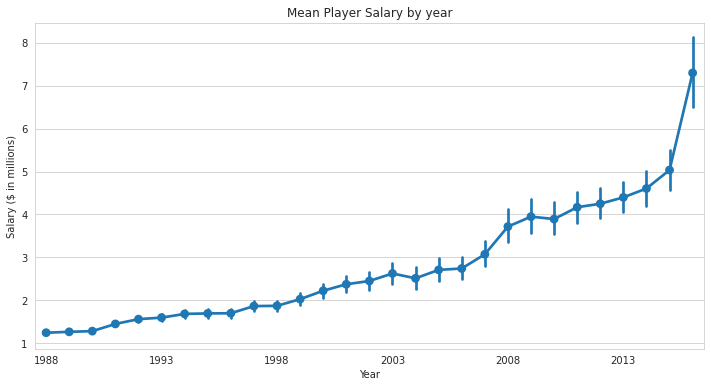

In [245]:
sns.set_style('whitegrid')
labels = [1988,'','','','',1993,'','','','',1998,'','','','',2003,'','','','',2008,'','','','',2013,'','','','','',2018]
sal_num = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='years',y='salary',data=merged_batting_df)
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

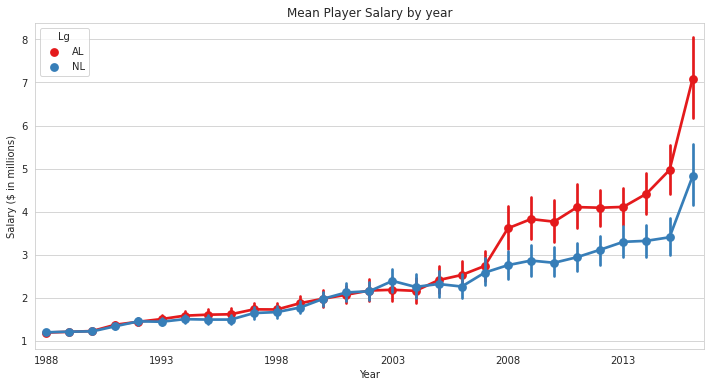

In [243]:
sns.set_style('whitegrid')
labels = [1988,'','','','',1993,'','','','',1998,'','','','',2003,'','','','',2008,'','','','',2013,'','','','','',2018]
sal_num = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='years',y='salary',hue='Lg',data=merged_batting_df,palette='Set1',hue_order=['AL','NL'])
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

## Since 1988, the average MLB salary of batsman has almost increase by a factor of 9, from 500k in 1988 to 7.1 Million in 2015. 
This would be interesting to look at it in comparison to MLB net revenue, which could explain the growth here, along with possibly TV deals.

The average salary of an MLB player has since 1990, after staying stagnant through the late 80s. There was a small bump in 1991, where it hovered around 1 Million USD until 1999 , where it rose up to $2 million by 2000. The average salary steadily rose in the early 2000s, until 2006.

The American and National league average salaries diverged in 2006, with National league salaries staying around 2.6 million USD, reaching almost 3 million USD in 2009. American league salaries rose past 3 million 3 years earlier than National league salaries, in 2006. The National League has since been playing "catch-up" with the American league. 

The largest gap between American League and National League salaries was in the latest reported year, 2016, with a difference of ~$2 million.

# Mean Pitcher Salary

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

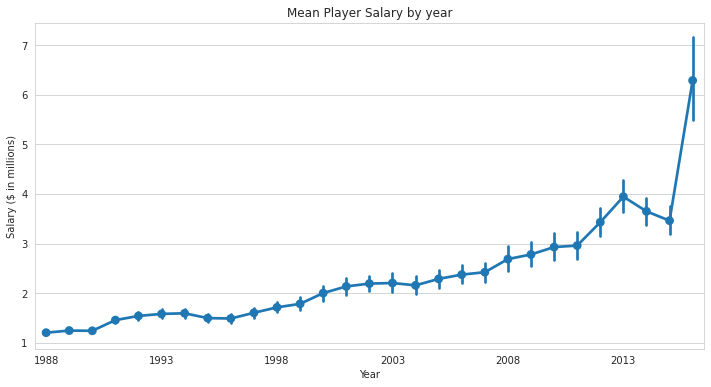

In [246]:
sns.set_style('whitegrid')
labels = [1988,'','','','',1993,'','','','',1998,'','','','',2003,'','','','',2008,'','','','',2013,'','','','','',2018]
sal_num = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='years',y='salary',data=merged_pitching_df)
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

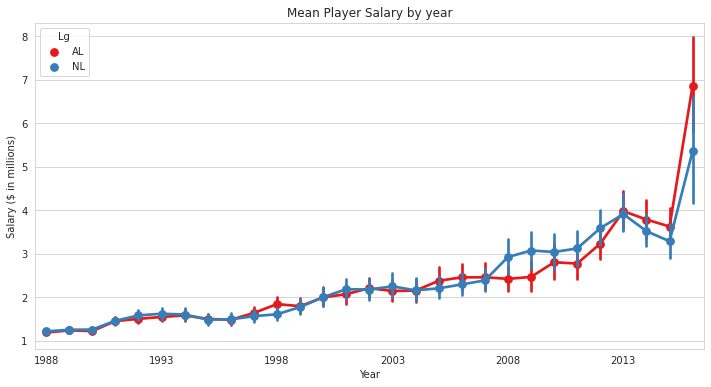

In [247]:
sns.set_style('whitegrid')
labels = [1988,'','','','',1993,'','','','',1998,'','','','',2003,'','','','',2008,'','','','',2013,'','','','','',2018]
sal_num = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='years',y='salary',hue='Lg',data=merged_pitching_df,palette='Set1',hue_order=['AL','NL'])
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($ in millions)')
ax.set_xticklabels(labels)
ax.set_title('Mean Player Salary by year')
ax.set_yticklabels(sal_num)

there can be seen a clear gap in the salaries of Amarican League and National League pitchers' salaries from 2007 and again on the same point in 2014. 

The American and National league average salaries for pitchers diverged in 2007, with National league salaries staying around 2.4 million USD, reaching almost 3 million USD in 2009. American league salaries rose past 3 million 3 years earlier than National league salaries, in 2006. The National League has since been playing "catch-up" with the American league.

The largest gap between American League and National League salaries was in the latest reported year, 2016, with a difference of ~$1.5 million.

In [366]:
merged_batting_df.head()

,years,team,pos,name,salary,Name,Year,Lg,Tm,RBI,H,HR,G,Closest Batsman Name
0,1991,LAD,OF,Darryl Strawberry,3800000.0,Darryl Strawberry*,1991,NL,LAD,99,134,28,139,Darryl Strawberry
1,1991,CIN,OF,Eric Davis,3600000.0,Eric Davis,1991,NL,CIN,33,67,11,89,Eric Davis
2,1991,OAK,OF,Jose Canseco,3500000.0,Jose Canseco,1991,AL,OAK,122,152,44,154,Jose Canseco
3,1991,NYY,1B,Don Mattingly,3420000.0,Don Mattingly*,1991,AL,NYY,68,169,9,152,Don Mattingly
4,1991,CHC,OF,Andre Dawson,3300000.0,Andre Dawson,1991,NL,CHC,104,153,31,149,Andre Dawson


In [367]:
df = pd.read_csv('all_batting_statistics_new.csv')
merged_batting_df[['H']] = merged_batting_df[['H']].apply(pd.to_numeric)
merged_batting_df[['RBI']] = merged_batting_df[['RBI']].apply(pd.to_numeric)
merged_batting_df[['HR']] = merged_batting_df[['HR']].apply(pd.to_numeric)
merged_batting_df[['G']] = merged_batting_df[['G']].apply(pd.to_numeric)
# merged_batting_df.astype({'salary': 'int64','RBI':'int64','HR':'int64','G':'int64','H':'int64'}).dtypes

In [368]:
# n_df = merged_batting_df.astype(str)
bat_sal = pd.merge( merged_batting_df, df, left_on=['Year','Name','Tm','Lg','RBI','H','HR','G'], right_on=['Year','Name','Tm','Lg','RBI','H','HR','G'], how='inner' )

In [369]:
bat_sal['1B'] = (bat_sal['H']-((bat_sal['2B'])+(bat_sal['3B'])+(bat_sal['HR'])))

#batting average - how many hits a player has per at-bat
bat_sal['AVG'] = ((bat_sal['H'].apply(float))/(bat_sal['AB'].apply(float)))

#on-base percentage- how often a player reaches base [hits]+[walks]+[hit by pitch]/[at-bats]+[walks]+[hit by pitch]+[sacrifice flies]
bat_sal['OBP'] = (((bat_sal['H'].apply(float))+(bat_sal['BB'])+(bat_sal['HBP'])))/((bat_sal['AB'].apply(float))+(bat_sal['SF'])+(bat_sal['BB'])+(bat_sal['HBP']))

#slugging- total bases/at-bats: [Singles] + [Doubles] + [Triples x 2] + [Home Runs x 3])/At Bats
bat_sal['SLG'] = ((bat_sal['1B'])+(bat_sal['2B']*2)+(bat_sal['3B']*3)
                  +(bat_sal['HR']*4))/(bat_sal['AB'].apply(float))

#OPS - on base plus slugging
bat_sal['OPS'] = bat_sal['OBP']+bat_sal['SLG']

In [370]:
print (bat_sal['AVG'].describe())

count    8329.000000
mean        0.254230
std         0.053546
min         0.000000
25%         0.232258
50%         0.261029
75%         0.285714
max         1.000000
Name: AVG, dtype: float64


In [371]:
bat_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8355 entries, 0 to 8354
Data columns (total 39 columns):
years                   8355 non-null int64
team                    8355 non-null object
pos                     8355 non-null object
name                    8355 non-null object
salary                  8355 non-null float64
Name                    8355 non-null object
Year                    8355 non-null int64
Lg                      8355 non-null object
Tm                      8355 non-null object
RBI                     8355 non-null int64
H                       8355 non-null int64
HR                      8355 non-null int64
G                       8355 non-null int64
Closest Batsman Name    8355 non-null object
Rk                      8355 non-null int64
Age                     8355 non-null int64
PA                      8355 non-null int64
AB                      8355 non-null int64
R                       8355 non-null int64
2B                      8355 non-null int64
3B  

Looking at the info above, we see that the AVG category has a lot of null values. THis is indicative of null values for either at-bats or hits. Lets take a closer look.

In [372]:
bat_sal[bat_sal['AVG'].isnull()]

,years,team,pos,name,salary,Name,Year,Lg,Tm,RBI,...,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,1B,AVG
52,1995,OAK,1B,Mark McGwire,6900000.0,Mark Acre,1995,AL,OAK,0,...,NaN,0,0,0,0,0,0,1,0,NaN
102,1991,TEX,C,John Russell,2450000.0,Jeff Russell,1991,AL,TEX,0,...,NaN,0,0,0,0,0,0,1,0,NaN
258,2005,NYY,3B,Alex Rodriguez,26000000.0,Felix Rodriguez,2005,AL,NYY,0,...,NaN,0,0,0,0,0,0,1,0,NaN
632,1994,OAK,1B,Mark McGwire,3000000.0,Mark Acre,1994,AL,OAK,0,...,NaN,0,0,0,0,0,0,1,0,NaN
1231,1999,CHC,1B,Mark Grace,4100000.0,Mark Guthrie,1999,NL,CHC,0,...,NaN,0,0,0,0,0,0,1,0,NaN
1970,2005,DET,2B,Fernando Vina,3000000.0,Fernando Rodney,2005,AL,DET,0,...,NaN,0,0,0,0,0,0,1,0,NaN
2542,1997,SEA,OF,Bobby Ayala,600000.0,Bobby Ayala,1997,AL,SEA,0,...,NaN,0,0,0,0,0,0,1,0,NaN
2773,1989,BAL,3B,Rick Schu,170000.0,Rick Schu,1989,AL,BAL,0,...,NaN,0,0,0,0,0,0,/4,0,NaN
3025,2000,STL,C,Mike Matheny,750000.0,Mike Matthews*,2000,NL,STL,0,...,NaN,0,0,0,0,0,0,1,0,NaN
3276,1995,DET,C,John Flaherty,172500.0,John Doherty,1995,AL,DET,0,...,NaN,0,0,0,0,0,0,1,0,NaN


In [373]:
bat_sal_clean = bat_sal.dropna(subset=['AVG'])

In [374]:
bat_sal_clean = bat_sal[bat_sal['AB']>100]

Good! We now do not have any missing values.


As we know that the average/median salary has risen over time, it is important to standardize the salary data to quantify how large a player's salary is respective to the mean salary of the respective year.

In [375]:
def standardize(df):
    return (df - df.mean()) / (df.std())

In [376]:
#standardizing the salary data with respect to year
bat_sal_clean['sal_z'] = bat_sal_clean.groupby('years')['salary'].apply(standardize)

/home/zulqar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [377]:
bat_sal_clean['sal_z'].head(2)

0    2.977399
1    2.765834
Name: sal_z, dtype: float64

## 5. Questions 2-7: What is the relationship between some key batting stats and salary?

Let's see if there is a arelationship between salary and:
- Batting Average
- Home Runs
- Runs Scored
- Runs Batted In
- On-base percentage (OBP)
- Slugging percentage (SLG)
- On-base plus slugging (OPS)

First, I will look at each of these features independantly to see their distributions.

Next, I will evauate relatonships between the standardized salary and each of the 7 named features. To accomplish this, linear regression plots of each comparing the standardized salary scores with the above metrics will be created.

I predict positive relationships for Home Runs and the percentage categories (OBP,SLG,OPS), but not strong positive relationships for for the others (BA, R, RBIs)

After, I will break it down by league and see if there are any differences between them. I predict that the National League to have slighly weaker relationships than the American league, as it had lower median/average salaries in recent years.

Text(0, 0.5, '')

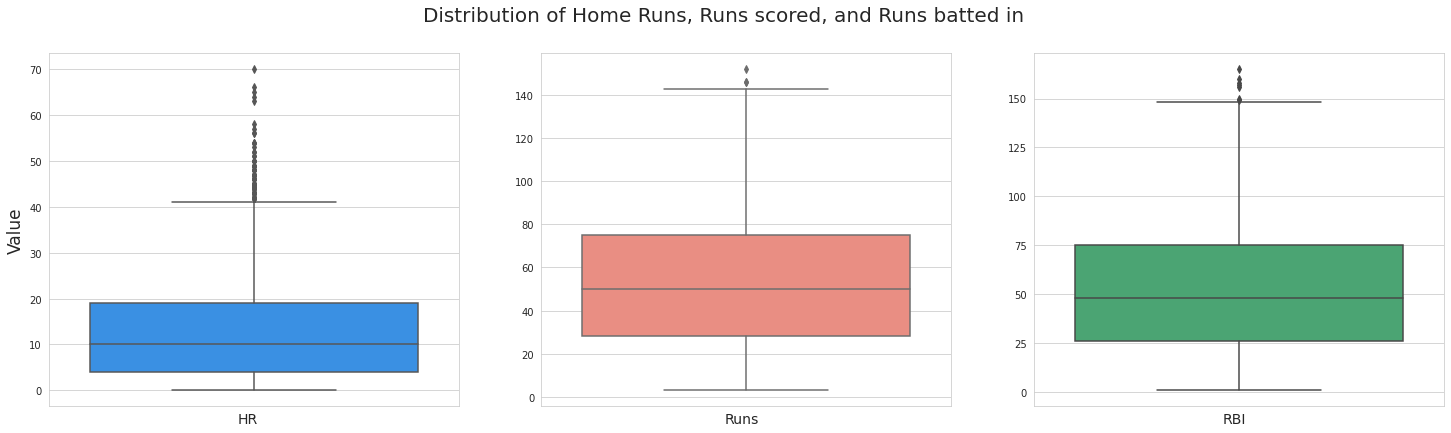

In [378]:
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(25)
fig.set_figheight(6.5)

sns.boxplot(bat_sal_clean['HR'],ax=ax[0],orient='v',color='dodgerblue')
sns.boxplot(bat_sal_clean['R'],ax=ax[1],orient='v',color='salmon')
sns.boxplot(bat_sal_clean['RBI'],ax=ax[2],orient='v',color='mediumseagreen')
fig.suptitle('Distribution of Home Runs, Runs scored, and Runs batted in',fontsize=20)
fig.text(0.23, 0.09, 'HR', ha='left',fontsize=14)
fig.text(0.51, 0.09, 'Runs', ha='center',fontsize=14)
fig.text(0.79, 0.09, 'RBI', ha='right',fontsize=14)
ax[0].set_ylabel('Value',fontsize=17)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

In [379]:
print (bat_sal_clean['HR'].describe(),bat_sal_clean['R'].describe(),bat_sal_clean['RBI'].describe())

count    7143.000000
mean       13.080358
std        10.792601
min         0.000000
25%         4.000000
50%        10.000000
75%        19.000000
max        70.000000
Name: HR, dtype: float64 count    7143.000000
mean       53.419432
std        29.322761
min         3.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       152.000000
Name: R, dtype: float64 count    7143.000000
mean       53.065939
std        31.441099
min         1.000000
25%        26.000000
50%        48.000000
75%        75.000000
max       165.000000
Name: RBI, dtype: float64


The average player hard 13 Home Runs, 50 Runs, and 53 Runs Batted In. There are large deviation values for each feature, however. Runs had a slightly larger median (44) than RBIs (48).

Text(0, 0.5, '')

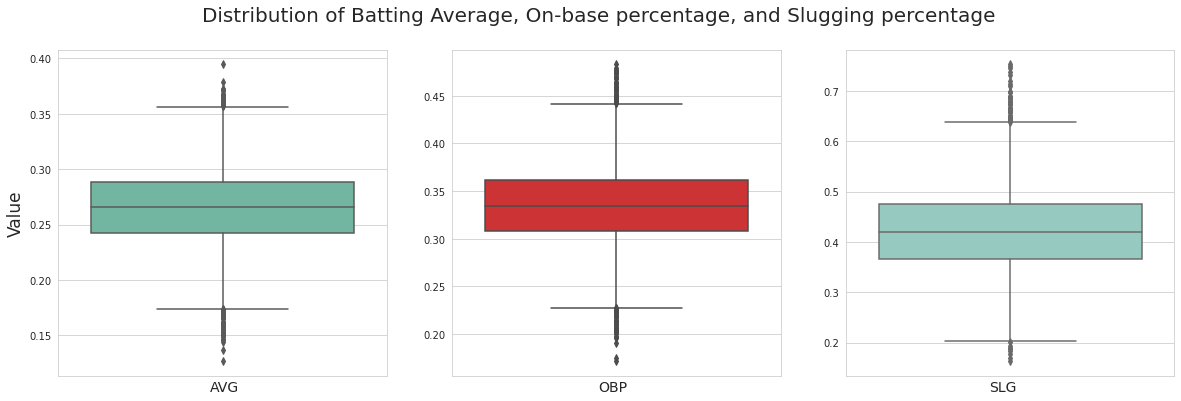

In [380]:
fig, ax = plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(20)
fig.set_figheight(6)
sns.boxplot(bat_sal_clean['AVG'],ax=ax[0],orient='v',palette='Set2')
sns.boxplot(bat_sal_clean['OBP'],ax=ax[1],orient='v',palette='Set1')
sns.boxplot(bat_sal_clean['SLG'],ax=ax[2],orient='v',palette='Set3')

fig.suptitle('Distribution of Batting Average, On-base percentage, and Slugging percentage',fontsize=20)
fig.text(0.51, 0.09, 'OBP', ha='center',fontsize=14)
fig.text(0.23, 0.09, 'AVG', ha='left',fontsize=14)
fig.text(0.79, 0.09, 'SLG', ha='right',fontsize=14)
ax[0].set_ylabel('Value',fontsize=17)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

Text(0, 0.5, 'Value')

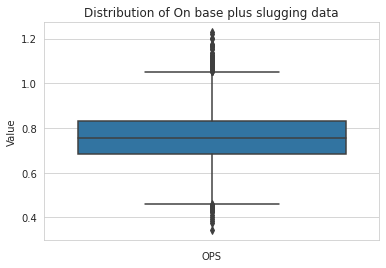

In [381]:
sns.boxplot(bat_sal_clean['OPS'],orient='v')
plt.title('Distribution of On base plus slugging data')
plt.xlabel('OPS')
plt.ylabel('Value')

The average player had a batting average of .262, On-base percentage of .329, and an Slugging percentage of .409, and an OPS of .738.

'''

Now let's visualize possible relationships between standardized salary and the above metrics.

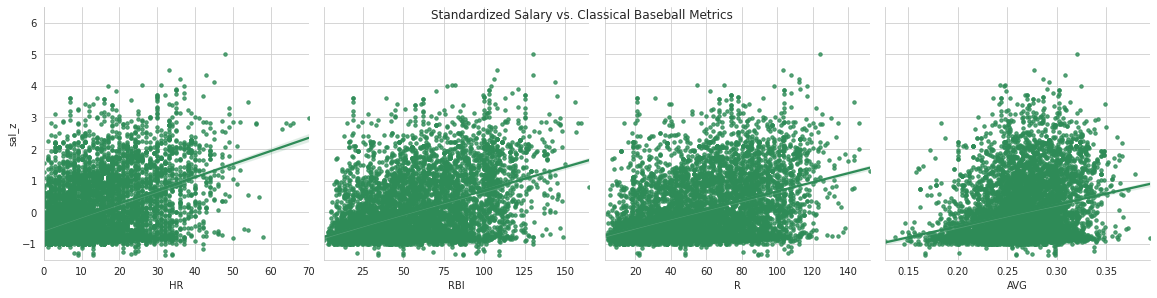

In [382]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],height=4, x_vars=["HR", "RBI",'R','AVG'],)
g.map(sns.regplot,scatter_kws={'s':12},dropna=True,color='seagreen')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. Classical Baseball Metrics')
g.set(ylim=(-1.5, 6.5))

As expected, there was a somewhat strong positive relationship between Standardized Salary and Home Runs, and weaker positive relationships between Standardized Salary and RBIs, Runs Scored, and Batting Average. Unsurprisingly batting average had the weakest positive relationship, but it was stronger than expected.

Now let's see if there is any effect between leagues:

/home/zulqar/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


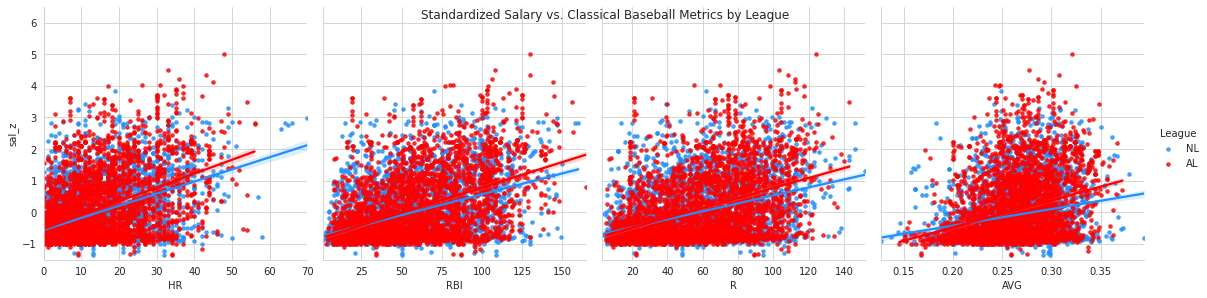

In [383]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["HR", "RBI",'R','AVG'],
                 hue="Lg",palette=['dodgerblue','red'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True)
g.add_legend(title='League')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. Classical Baseball Metrics by League')
g.set(ylim=(-1.5, 6.5))

As expected, the National league had slighter weaker positive relationships than the American league, but for the most part nothing out of the ordinary here.

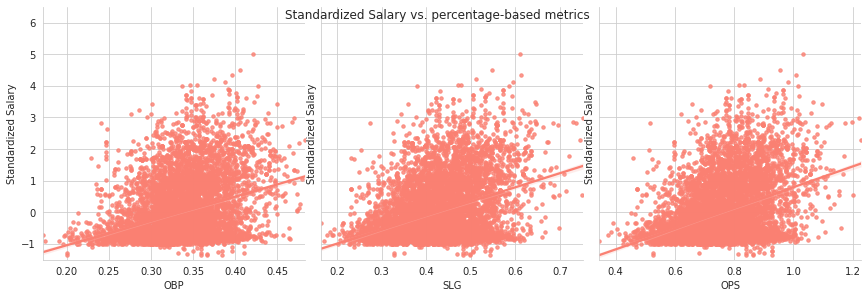

In [384]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],height=4, x_vars=["OBP", "SLG",'OPS'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True,color='salmon')
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. percentage-based metrics')
g.set(ylim=(-1.5, 6.5))
g.set(ylabel='Standardized Salary')

There are strong positive relationships between Standardized Salary and OBP, SLG, and OPS. with OPS and OBP being stronger than Slugging. Players with higher stats in these categories were more likely to have a higher salary than a lower salary.

/home/zulqar/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


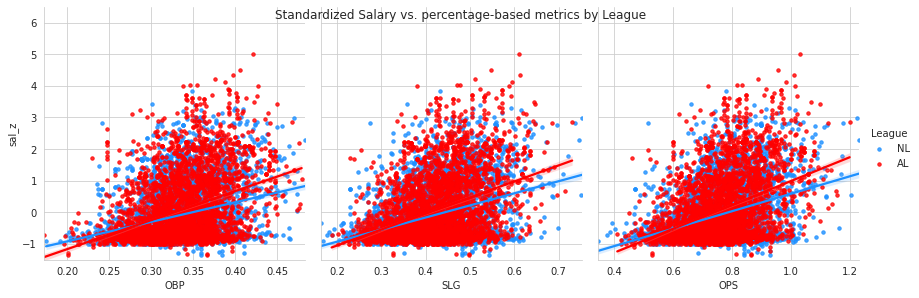

In [385]:
g = sns.PairGrid(bat_sal_clean, y_vars=['sal_z'],size=4, x_vars=["OBP", "SLG",'OPS'],hue='Lg',palette=['dodgerblue','r'])
g.map(sns.regplot,scatter_kws={'s':12},dropna=True)
g.fig.set_alpha(0.8) 
g.fig.suptitle('Standardized Salary vs. percentage-based metrics by League')
g.set(ylim=(-1.5, 6.5))
g.add_legend(title='League')


As expected, National League had a weaker positive relationship than the American League did between Standardized Salary and OBP, Slugging, and OPS. Nothing jumps out here though, however.

## Conclusion

I first looked at how the average salary has changed over time, by mean and median.
While the mean salary has increased 9-fold since 1988 (from 500,000 USD in '88 to 4.5 million USD in '16), the median salary has has tripled since 1985, from below 500k to 7.1 Milllion. 

This salary data was then joined with batting data on Player ID and Year, and the salary data was then standardized to put each salary point in context with it's respective year. This standardized salary was then analyzed to see if there were positive relationships between it and:
- Batting Average
- Home Runs
- Runs Scored
- Runs Batted In
- On base percentage
- Slugging percentage
- OPS (On-base plus slugging)

There are positive relationships between standardized salary and each of the features above, but the strongest positive relatonships appeared to be with OBP/OPS and Home Runs.

There are some limitations here. One, I did not include player position in the analysis, which probably plays some role in how much a player makes. As I did not include this, I filtered the dataset using having 100 At-Bats as a threshold to weed out pitchers, who don't bat much (American League) and don't bat well, as it is not their main job. This has an effect of also filtering out players who stayed in the majors for a short time, or got hurt and missed a lot of the season. So there is one qualification:
- minimum 100 at-bats

In the future I would like to carry out similar analyses with respect to position, pitching statistics (Wins, ERA, etc.) as well as WAR.